## importing all the neccesary libraries 

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import plotly.express as px
import matplotlib
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
%matplotlib inline 

## Task
The Rain in Australia dataset contains about 10 years of daily weather observations from numerous Australian weather stations. Here's a small sample from the dataset:

In [2]:
weather_df = pd.read_csv('weatherAUS.csv')
weather_df.head(3)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   

   RainTomorrow  
0            No  
1            No  
2            No  

[3 rows x 23 columns]

As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow.

## Linear Regression vs. Logistic Regression
In the previous tutorial, we attempted to predict a person's annual medical charges using linear regression. In this tutorial, we'll use logistic regression, which is better suited for classification problems like predicting whether it will rain tomorrow. Identifying whether a given problem is a classfication or regression problem is an important first step in machine learning.

Classification Problems
Problems where each input must be assigned a discrete category (also called label or class) are known as classification problems.

Here are some examples of classification problems:

Rainfall prediction: Predicting whether it will rain tomorrow using today's weather data (classes are "Will Rain" and "Will Not Rain")

Breast cancer detection: Predicting whether a tumor is "benign" (noncancerous) or "malignant" (cancerous) using information like its radius, texture etc.

Loan Repayment Prediction - Predicting whether applicants will repay a home loan based on factors like age, income, loan amount, no. of children etc.

Handwritten Digit Recognition - Identifying which digit from 0 to 9 a picture of handwritten text represents.
Can you think of some more classification problems?

## Regression Problems
Problems where a continuous numeric value must be predicted for each input are known as regression problems.

Here are some example of regression problems:

Medical Charges Prediction
House Price Prediction
Ocean Temperature Prediction
Weather Temperature Prediction
Can you think of some more regression problems?

EXERCISE: Replicate the steps followed in the previous tutorial with each of the above datasets.

### Linear Regression for Solving Regression Problems

Linear regression is a commonly used technique for solving regression problems. In a linear regression model, the target is modeled as a linear combination (or weighted sum) of input features. The predictions from the model are evaluated using a loss function like the Root Mean Squared Error (RMSE).


Here's a visual summary of how a linear regression model is structured:

<img src="https://i.imgur.com/iTM2s5k.png" width="480">


For a mathematical discussion of linear regression, watch [this YouTube playlist](https://www.youtube.com/watch?v=kHwlB_j7Hkc&list=PLJs7lEb1U5pYnrI0Wn4mzPmppVqwERL_4&index=1)

### Logistic Regression for Solving Classification Problems

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">


The output of the sigmoid function is called a logistic, hence the name _logistic regression_. For a mathematical discussion of logistic regression, sigmoid activation and cross entropy, check out [this YouTube playlist](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy&index=1). Logistic regression can also be applied to multi-class classification problems, with a few modifications.

### Machine Learning Workflow

Whether we're solving a regression problem using linear regression or a classification problem using logistic regression, the workflow for training a model is exactly the same:

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://i.imgur.com/g32CoIy.png" width="480">


Classification and regression are both supervised machine learning problems, because they use labeled data. Machine learning applied to unlabeled data is known as unsupervised learning ([image source](https://au.mathworks.com/help/stats/machine-learning-in-matlab.html)). 

<img src="https://i.imgur.com/1EMQmAw.png" width="480">


In this tutorial, we'll train a _logistic regression_ model using the Rain in Australia dataset to predict whether or not it will rain at a location tomorrow, using today's data. This is a _binary classification_ problem.

Let's install the `scikit-learn` library which we'll use to train our model.

In [3]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
weather_df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [5]:
weather_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)


In [6]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [7]:
weather_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

## Exploratory Data Analysis and Visualization

Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries. Follow these tutorials to learn how to use these libraries:

- https://jovian.ai/aakashns/python-matplotlib-data-visualization
- https://jovian.ai/aakashns/interactive-visualization-plotly
- https://jovian.ai/aakashns/dataviz-cheatsheet

In [8]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [9]:
weather_df.Location.nunique()

49

In [10]:
px.histogram(weather_df, x = 'Location', title='Location vs. Rainy Days', color='RainToday')

In [11]:
px.histogram(weather_df,
             x= 'Temp3pm',
             title= 'Temperature at 3 pm vs. Rain Tomorrow',
             color = 'RainTomorrow')

In [12]:
px.histogram(weather_df, 
             x= 'RainTomorrow', 
             color = 'RainToday',
             title='Rain Tomorrow vs. Rain Today')

In [13]:
px.scatter(weather_df.sample(2000),
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x = 'Temp3pm',
           y = 'Humidity3pm',
           color='RainTomorrow')

In [14]:
px.histogram(weather_df.sample(2000),
                 title='Rainfall',
                 x='RainToday',
                 color='Rainfall',)

In [15]:
px.scatter(weather_df.sample(1000), 
             x= 'MinTemp', 
             color = 'MaxTemp',
             title='MaxTemp vs. MinTemp')

In [16]:
px.scatter(weather_df.sample(1000),
           title='Temp (9 pm) vs. Temp (3 pm)',
           x = 'Temp3pm',
           color = 'Temp9am'
           )

In [17]:
px.scatter(weather_df.sample(1000),
       x = 'MaxTemp',
       color = 'Rainfall',
       title='MaxTemp vs. Rainfall')

In [18]:
px.box(weather_df.sample(1000),
          x = 'Humidity3pm',
          color = 'RainTomorrow',
          title='Humidity3pm vs. RainTomorrow')

In [19]:
px.scatter(weather_df.sample(1000),
        x = 'Date',
        color= 'Rainfall',
        title= 'Date vs. Temp')

In [20]:
px.scatter(weather_df.sample(2000), 
           title='Min Temp. vs Max Temp.',
           x='MinTemp', 
           y='MaxTemp', 
           color='RainToday')

## (Optional) Working with a Sample

When working with massive datasets containing millions of rows, it's a good idea to work with a sample initially, to quickly set up your model training notebook. If you'd like to work with a sample, just set the value of `use_sample` to `True`.

In [21]:
use_sample = True
sample_fraction = 0.1
if use_sample:
    weather_df = weather_df.sample(frac = sample_fraction).copy()

Make sure to set `use_sample` to `False` and re-run the notebook end-to-end once you're ready to use the entire dataset.

## Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique. 


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. [Learn more here.](https://www.fast.ai/2017/11/13/validation-sets/)


3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


<img src="https://i.imgur.com/j8eITrK.png" width="480">


As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.


When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the `train_test_split` utility from `scikit-learn`. Learn more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_val_df, test_df = train_test_split(weather_df, test_size= 0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42 )

In [24]:
print('train_df.shape', train_df.shape)
print('val_df.shape', val_df.shape)
print('test_df.shape', test_df.shape)

train_df.shape (8447, 23)
val_df.shape (2816, 23)
test_df.shape (2816, 23)


However, while working with dates, it's often a better idea to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.

For the current dataset, we can use the Date column in the dataset to create another column for year. We'll pick the last two years for the test set, and one year before it for the validation set.

C:\Users\idree\AppData\Local\Temp\ipykernel_18416\3518803483.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\idree\AppData\Local\Temp\ipykernel_18416\3518803483.py:2: UserWarning:


The palette list has fewer values (4) than needed (11) and will cycle, which may produce an uninterpretable plot.



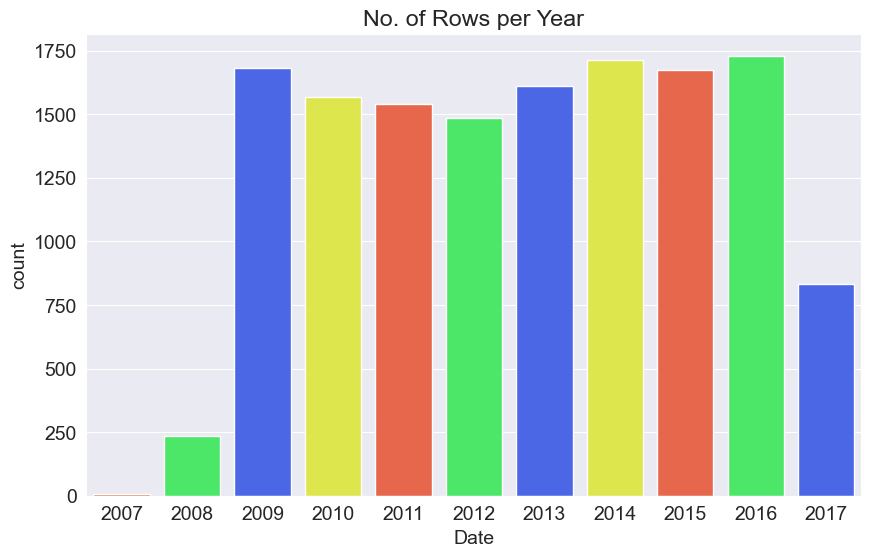

In [29]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(weather_df.Date).dt.year, palette=['#FF5733', '#33FF57', '#3357FF', '#F3FF33']);

In [31]:
year = pd.to_datetime(weather_df.Date).dt.year

train_df = weather_df[year < 2015]
val_df = weather_df[year == 2015]
test_df = weather_df[year > 2015]

In [32]:
print('train_df.shape', train_df.shape)
print('val_df.shape', val_df.shape)
print('test_df.shape', test_df.shape)

train_df.shape (9846, 23)
val_df.shape (1672, 23)
test_df.shape (2561, 23)


While not a perfect 60-20-20 split, we have ensured that the test validation and test sets both contain data for all 12 months of the year.

In [33]:
train_df

Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
26123   2014-08-17        Penrith     10.0     17.7      38.4          NaN   
29020   2014-04-27       Richmond     11.2     19.3       0.0          NaN   
134301  2012-06-23     Launceston     -0.8     12.3       0.6          NaN   
4430    2012-11-21  BadgerysCreek      8.4     28.9       0.0          NaN   
87228   2008-12-29         Cairns     24.2     31.4      35.0          2.6   
...            ...            ...      ...      ...       ...          ...   
75019   2009-02-09       Portland     12.1     17.9       0.0          5.2   
43632   2011-12-21     Wollongong     16.9     21.5       0.4          NaN   
13971   2014-06-17          Moree      3.1     17.2       0.0          3.2   
108631  2009-01-30         Albany     16.5     22.5       0.0          4.8   
90522   2009-09-09      GoldCoast     12.7     25.7       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
26123        NaN           W           33.0        SSW  ...        91.0   
29020        NaN          SE           24.0         SW  ...        82.0   
134301       NaN         NNW           39.0        NaN  ...        98.0   
4430         NaN         NNE           31.0        NNE  ...        64.0   
87228        5.3         NNE           28.0        NaN  ...        78.0   
...          ...         ...            ...        ...  ...         ...   
75019       11.1         SSW           35.0          S  ...        53.0   
43632        NaN           S           30.0          S  ...        75.0   
13971        9.9           S           44.0          S  ...        83.0   
108631       0.0         NaN            NaN          E  ...        85.0   
90522        NaN          NW           35.0        WNW  ...        32.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
26123          60.0          NaN          NaN       NaN       NaN     13.2   
29020          66.0       1023.8       1023.0       NaN       NaN     17.6   
134301         63.0       1012.4       1013.0       NaN       NaN      3.1   
4430           34.0       1018.0       1011.3       NaN       NaN     18.3   
87228          73.0       1007.7       1004.6       8.0       7.0     28.3   
...             ...          ...          ...       ...       ...      ...   
75019          44.0       1019.9       1019.7       5.0       2.0     14.0   
43632          78.0          NaN       1017.1       4.0       8.0     20.2   
13971          50.0       1027.6       1025.3       1.0       1.0      9.5   
108631         65.0       1014.2       1013.0       8.0       8.0     18.5   
90522          25.0       1014.6       1011.2       NaN       NaN     21.7   

        Temp3pm  RainToday  RainTomorrow  
26123      16.8        Yes           Yes  
29020      18.8         No            No  
134301     11.2         No            No  
4430       26.8         No            No  
87228      29.5        Yes            No  
...         ...        ...           ...  
75019      16.6         No           Yes  
43632      20.6         No           Yes  
13971      16.7         No            No  
108631     21.0         No            No  
90522      25.6         No            No  

[9846 rows x 23 columns]

In [34]:
val_df

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
86379   2015-03-28      Brisbane     22.3     28.5       0.0          5.8   
105013  2015-12-25     Nuriootpa     21.0     36.5       0.0         10.8   
144789  2015-08-25         Uluru      8.9     19.0       0.0          NaN   
138382  2015-06-28  AliceSprings      1.6     20.3       0.0          2.6   
126234  2015-11-06    SalmonGums     12.6     31.4       0.0          NaN   
...            ...           ...      ...      ...       ...          ...   
8292    2015-05-22         Cobar      8.1     13.6      25.6          2.6   
54266   2015-03-13   MountGinini      6.2     11.4       0.0          NaN   
14494   2015-11-22         Moree     18.4     36.7       0.0         37.6   
44728   2015-02-18    Wollongong     20.6     25.4       0.0          NaN   
107810  2015-05-27       Woomera     11.7     23.5       0.0          3.6   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
86379        4.7         ENE           24.0        SSE  ...        75.0   
105013       5.2         WNW           50.0          N  ...        18.0   
144789       NaN           E           44.0          E  ...        54.0   
138382      10.2           E           39.0        NaN  ...        68.0   
126234       NaN           N           54.0        NNE  ...        22.0   
...          ...         ...            ...        ...  ...         ...   
8292         NaN          SW           31.0         SW  ...        89.0   
54266        NaN         ENE           26.0          E  ...        98.0   
14494       12.7         NNE           52.0        NNE  ...        54.0   
44728        NaN          NE           35.0          E  ...        79.0   
107810       3.1          NW           31.0        NaN  ...        52.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
86379          50.0       1020.9       1018.7       7.0       5.0     25.5   
105013         16.0       1005.7       1001.9       3.0       NaN     31.4   
144789         44.0       1023.5       1020.2       NaN       4.0     12.7   
138382         35.0       1028.5       1023.9       0.0       1.0      8.5   
126234         32.0          NaN          NaN       NaN       NaN     28.4   
...             ...          ...          ...       ...       ...      ...   
8292           79.0       1024.0       1024.2       8.0       2.0      9.0   
54266          94.0          NaN          NaN       NaN       NaN      6.4   
14494          27.0       1014.4       1010.2       1.0       5.0     25.8   
44728          76.0       1020.1       1019.0       NaN       NaN     22.2   
107810         33.0       1022.1       1019.2       5.0       6.0     17.0   

        Temp3pm  RainToday  RainTomorrow  
86379      27.8         No            No  
105013     34.5         No            No  
144789     17.6         No            No  
138382     19.2         No            No  
126234     27.1         No           Yes  
...         ...        ...           ...  
8292       12.4        Yes            No  
54266      10.0         No            No  
14494      35.8         No            No  
44728      25.0         No           Yes  
107810     22.6         No            No  

[1672 rows x 23 columns]

In [35]:
train_df

Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
26123   2014-08-17        Penrith     10.0     17.7      38.4          NaN   
29020   2014-04-27       Richmond     11.2     19.3       0.0          NaN   
134301  2012-06-23     Launceston     -0.8     12.3       0.6          NaN   
4430    2012-11-21  BadgerysCreek      8.4     28.9       0.0          NaN   
87228   2008-12-29         Cairns     24.2     31.4      35.0          2.6   
...            ...            ...      ...      ...       ...          ...   
75019   2009-02-09       Portland     12.1     17.9       0.0          5.2   
43632   2011-12-21     Wollongong     16.9     21.5       0.4          NaN   
13971   2014-06-17          Moree      3.1     17.2       0.0          3.2   
108631  2009-01-30         Albany     16.5     22.5       0.0          4.8   
90522   2009-09-09      GoldCoast     12.7     25.7       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
26123        NaN           W           33.0        SSW  ...        91.0   
29020        NaN          SE           24.0         SW  ...        82.0   
134301       NaN         NNW           39.0        NaN  ...        98.0   
4430         NaN         NNE           31.0        NNE  ...        64.0   
87228        5.3         NNE           28.0        NaN  ...        78.0   
...          ...         ...            ...        ...  ...         ...   
75019       11.1         SSW           35.0          S  ...        53.0   
43632        NaN           S           30.0          S  ...        75.0   
13971        9.9           S           44.0          S  ...        83.0   
108631       0.0         NaN            NaN          E  ...        85.0   
90522        NaN          NW           35.0        WNW  ...        32.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
26123          60.0          NaN          NaN       NaN       NaN     13.2   
29020          66.0       1023.8       1023.0       NaN       NaN     17.6   
134301         63.0       1012.4       1013.0       NaN       NaN      3.1   
4430           34.0       1018.0       1011.3       NaN       NaN     18.3   
87228          73.0       1007.7       1004.6       8.0       7.0     28.3   
...             ...          ...          ...       ...       ...      ...   
75019          44.0       1019.9       1019.7       5.0       2.0     14.0   
43632          78.0          NaN       1017.1       4.0       8.0     20.2   
13971          50.0       1027.6       1025.3       1.0       1.0      9.5   
108631         65.0       1014.2       1013.0       8.0       8.0     18.5   
90522          25.0       1014.6       1011.2       NaN       NaN     21.7   

        Temp3pm  RainToday  RainTomorrow  
26123      16.8        Yes           Yes  
29020      18.8         No            No  
134301     11.2         No            No  
4430       26.8         No            No  
87228      29.5        Yes            No  
...         ...        ...           ...  
75019      16.6         No           Yes  
43632      20.6         No           Yes  
13971      16.7         No            No  
108631     21.0         No            No  
90522      25.6         No            No  

[9846 rows x 23 columns]

## Identifying Input and Target Columns

Often, not all the columns in a dataset are useful for training a model. In the current dataset, we can ignore the `Date` column, since we only want to weather conditions to make a prediction about whether it will rain the next day.

Let's create a list of input columns, and also identify the target column.

In [36]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [38]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [39]:
target_col

'RainTomorrow'

In [40]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [66]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [42]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [43]:
train_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
26123         Penrith     10.0     17.7      38.4          NaN       NaN   
29020        Richmond     11.2     19.3       0.0          NaN       NaN   
134301     Launceston     -0.8     12.3       0.6          NaN       NaN   
4430    BadgerysCreek      8.4     28.9       0.0          NaN       NaN   
87228          Cairns     24.2     31.4      35.0          2.6       5.3   
...               ...      ...      ...       ...          ...       ...   
75019        Portland     12.1     17.9       0.0          5.2      11.1   
43632      Wollongong     16.9     21.5       0.4          NaN       NaN   
13971           Moree      3.1     17.2       0.0          3.2       9.9   
108631         Albany     16.5     22.5       0.0          4.8       0.0   
90522       GoldCoast     12.7     25.7       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
26123            W           33.0        SSW        WSW  ...          19.0   
29020           SE           24.0         SW         SE  ...          17.0   
134301         NNW           39.0        NaN        NNW  ...          15.0   
4430           NNE           31.0        NNE        NNE  ...          13.0   
87228          NNE           28.0        NaN          N  ...          17.0   
...            ...            ...        ...        ...  ...           ...   
75019          SSW           35.0          S        SSW  ...          22.0   
43632            S           30.0          S        SSE  ...          20.0   
13971            S           44.0          S         SW  ...          24.0   
108631         NaN            NaN          E          E  ...          26.0   
90522           NW           35.0        WNW         NW  ...          17.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
26123          91.0         60.0          NaN          NaN       NaN   
29020          82.0         66.0       1023.8       1023.0       NaN   
134301         98.0         63.0       1012.4       1013.0       NaN   
4430           64.0         34.0       1018.0       1011.3       NaN   
87228          78.0         73.0       1007.7       1004.6       8.0   
...             ...          ...          ...          ...       ...   
75019          53.0         44.0       1019.9       1019.7       5.0   
43632          75.0         78.0          NaN       1017.1       4.0   
13971          83.0         50.0       1027.6       1025.3       1.0   
108631         85.0         65.0       1014.2       1013.0       8.0   
90522          32.0         25.0       1014.6       1011.2       NaN   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
26123        NaN     13.2     16.8        Yes  
29020        NaN     17.6     18.8         No  
134301       NaN      3.1     11.2         No  
4430         NaN     18.3     26.8         No  
87228        7.0     28.3     29.5        Yes  
...          ...      ...      ...        ...  
75019        2.0     14.0     16.6         No  
43632        8.0     20.2     20.6         No  
13971        1.0      9.5     16.7         No  
108631       8.0     18.5     21.0         No  
90522        NaN     21.7     25.6         No  

[9846 rows x 21 columns]

In [44]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [47]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


Let's view some statistics for the numeric columns.

In [46]:
train_inputs[numeric_cols].describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  9817.000000  9833.000000  9846.000000  6210.000000  5790.000000   
mean     11.988663    22.992474     2.353809     5.325974     7.593264   
std       6.373079     7.000977     8.439429     3.978468     3.828712   
min      -8.200000    -0.800000     0.000000     0.000000     0.000000   
25%       7.400000    17.800000     0.000000     2.600000     4.700000   
50%      11.800000    22.300000     0.000000     4.600000     8.500000   
75%      16.600000    27.900000     0.600000     7.200000    10.600000   
max      33.900000    46.000000   208.500000    55.800000    14.100000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    9129.000000   9759.000000   9742.000000  9741.000000  9731.000000   
mean       40.093219     13.973665     18.666906    68.730213    51.757887   
std        13.662482      8.947103      8.852636    19.098042    20.824272   
min         7.000000      0.000000      0.000000     1.000000     1.000000   
25%        31.000000      7.000000     13.000000    57.000000    37.000000   
50%        39.000000     13.000000     19.000000    70.000000    52.000000   
75%        48.000000     19.000000     24.000000    83.000000    66.000000   
max       113.000000     63.000000     76.000000   100.000000   100.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  8913.000000  8918.000000  6253.000000  6146.000000  9798.000000   
mean   1017.606160  1015.257712     4.295058     4.382525    16.801092   
std       7.098649     7.004379     2.884607     2.725216     6.455864   
min     987.200000   984.400000     0.000000     0.000000    -3.200000   
25%    1012.900000  1010.500000     1.000000     2.000000    12.100000   
50%    1017.600000  1015.200000     5.000000     5.000000    16.600000   
75%    1022.500000  1020.100000     7.000000     7.000000    21.300000   
max    1039.500000  1037.700000     8.000000     8.000000    37.700000   

           Temp3pm  
count  9788.000000  
mean     21.498222  
std       6.844827  
min      -1.800000  
25%      16.500000  
50%      20.800000  
75%      26.200000  
max      44.800000

In [48]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

## Imputing Missing Numeric Data

Machine learning models can't work with missing numerical data. The process of filling missing values is called imputation.

<img src="https://i.imgur.com/W7cfyOp.png" width="480">

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.

In [49]:
from sklearn.impute import SimpleImputer

In [93]:
imputer = SimpleImputer(strategy= 'mean')

In [94]:
weather_df[numeric_cols].isna().sum()

MinTemp            46
MaxTemp            26
Rainfall            0
Evaporation      5975
Sunshine         6715
WindGustSpeed     952
WindSpeed9am      108
WindSpeed3pm      245
Humidity9am       149
Humidity3pm       339
Pressure9am      1392
Pressure3pm      1386
Cloud9am         5347
Cloud3pm         5675
Temp9am            57
Temp3pm           253
dtype: int64

In [95]:
train_df[numeric_cols].isna().sum()

MinTemp            29
MaxTemp            13
Rainfall            0
Evaporation      3636
Sunshine         4056
WindGustSpeed     717
WindSpeed9am       87
WindSpeed3pm      104
Humidity9am       105
Humidity3pm       115
Pressure9am       933
Pressure3pm       928
Cloud9am         3593
Cloud3pm         3700
Temp9am            48
Temp3pm            58
dtype: int64

In [96]:
val_df[numeric_cols].isna().sum()

MinTemp            4
MaxTemp            4
Rainfall           0
Evaporation      828
Sunshine         885
WindGustSpeed    104
WindSpeed9am       9
WindSpeed3pm      38
Humidity9am       20
Humidity3pm       63
Pressure9am      175
Pressure3pm      171
Cloud9am         644
Cloud3pm         659
Temp9am            1
Temp3pm           45
dtype: int64

In [97]:
test_df[numeric_cols].isna().sum()

MinTemp            13
MaxTemp             9
Rainfall            0
Evaporation      1511
Sunshine         1774
WindGustSpeed     131
WindSpeed9am       12
WindSpeed3pm      103
Humidity9am        24
Humidity3pm       161
Pressure9am       284
Pressure3pm       287
Cloud9am         1110
Cloud3pm         1316
Temp9am             8
Temp3pm           150
dtype: int64

The first step in imputation is to `fit` the imputer to the data i.e. compute the chosen statistic (e.g. mean) for each column in the dataset. 

In [98]:
imputer.fit(weather_df[numeric_cols])

SimpleImputer()

After calling `fit`, the computed statistic for each column is stored in the `statistics_` property of `imputer`.

In [99]:
list(imputer.statistics_)

[np.float64(12.137190907147438),
 np.float64(23.180281790365047),
 np.float64(2.379941757227076),
 np.float64(5.461796643632773),
 np.float64(7.626235741444867),
 np.float64(39.874761941037555),
 np.float64(13.88740963424236),
 np.float64(18.566575104814227),
 np.float64(68.97774587221824),
 np.float64(51.78748180494905),
 np.float64(1017.751036494049),
 np.float64(1015.3791126605215),
 np.float64(4.446747595052679),
 np.float64(4.483698238933841),
 np.float64(16.93686350021395),
 np.float64(21.634782294228266)]

The missing values in the training, test and validation sets can now be filled in using the `transform` method of `imputer`.

In [101]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

The missing values are now filled in with the mean of each column.

In [100]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

## Scaling Numeric Features

Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.